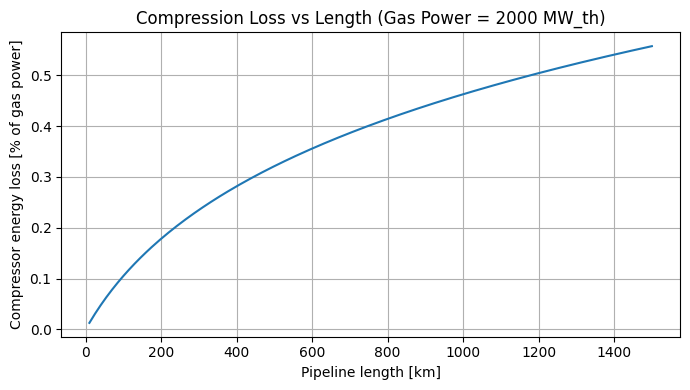

L =    10 km | inlet pressure ≈  72.24 bar | loss ≈ 0.013%
L =   309 km | inlet pressure ≈ 121.52 bar | loss ≈ 0.240%
L =   609 km | inlet pressure ≈ 155.94 bar | loss ≈ 0.359%
L =   908 km | inlet pressure ≈ 184.03 bar | loss ≈ 0.442%
L =  1208 km | inlet pressure ≈ 208.36 bar | loss ≈ 0.506%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# User parameters (edit these)
# -----------------------------

# Specify the raw gas power you want to transport
P_gas_MW = 2000.0            # MW of natural gas thermal power flow

# Gas properties
M_gas = 0.018                # molar mass [kg/mol] (~methane)
R_univ = 8.314               # universal gas constant [J/mol/K]
R_s = R_univ / M_gas         # specific gas constant [J/kg/K]
k = 1.30                     # heat capacity ratio
Z = 0.90                     # compressibility factor
T = 298.0                    # inlet temperature [K]
eta_c = 0.75                 # compressor efficiency

# Convert MW thermal to mass flow
P_gas_W = P_gas_MW * 1e6     # convert MW → W

# PICK an effective heating value to convert gas power → mass flow
# Use a realistic LHV for natural gas:
LHV = 50e6                   # 50 MJ/kg (this is just physics!)

m_dot = P_gas_W / LHV        # [kg/s]

# Pipeline parameters
D = 16/39.37                    # pipe diameter [m] (~36")
f = 0.011                    # Darcy friction factor
p_out_bar = 70.0             # downstream pressure [bar]
p_out = p_out_bar * 1e5      # [Pa]

# Length range for the plot
L_km = np.linspace(10, 1500, 200)  # km


# -----------------------------
# Helper calculations
# -----------------------------

# Pipe area
A = np.pi * D**2 / 4.0

# Isothermal compressible-flow constant:
# p1^2 - p2^2 = (f * Z * R_s * T * m_dot^2 / (D * A**2)) * L
C = f * Z * R_s * T * m_dot**2 / (D * A**2)


def compressor_power_vs_length(L_km_array):
    L_m = L_km_array * 1000
    p2_sq = p_out**2

    # upstream pressure for each length
    p1_sq = p2_sq + C * L_m
    p1 = np.sqrt(p1_sq)

    # compression ratio
    pi = p1 / p_out

    # specific work
    exponent = (k - 1.0) / k
    w = (k/(k-1)) * (R_s * T / Z) * (pi**exponent - 1.0) / eta_c  # [J/kg]

    # compressor power
    P_comp = m_dot * w  # [W]

    # percent of gas energy lost
    pct_lost = 100.0 * P_comp / P_gas_W

    # return upstream pressures in bar for reference
    return P_comp, pct_lost, p1 / 1e5


# -----------------------------
# Run & Plot
# -----------------------------

P_comp_W, pct_lost, p1_bar = compressor_power_vs_length(L_km)

plt.figure(figsize=(7,4))
plt.plot(L_km, pct_lost)
plt.xlabel("Pipeline length [km]")
plt.ylabel("Compressor energy loss [% of gas power]")
plt.title(f"Compression Loss vs Length (Gas Power = {P_gas_MW:.0f} MW_th)")
plt.grid(True)
plt.tight_layout()
plt.show()





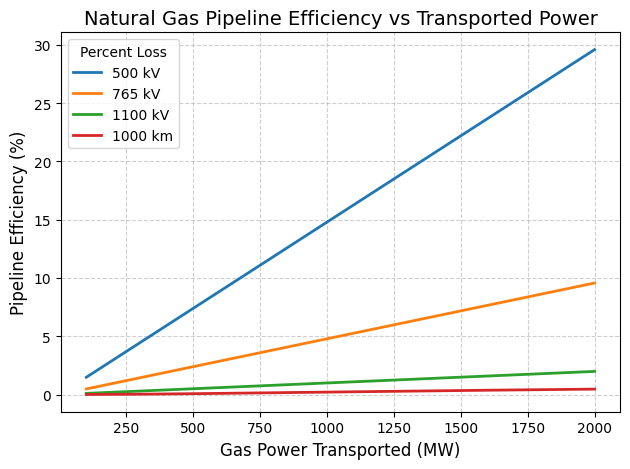

In [36]:


# --- Input data ---
voltages_kV = [ 500, 765, 1100]          # kV
resistances = [ 0.037, 0.028, 0.012, 0.005] # ohm/km
lengths = [1000]                             # km
powers_MW = np.linspace(100, 2000, 300)           # MW (x-axis)

# --- Efficiency calculation ---
def line_efficiency(P_MW, V_kV, R_per_km, length_km):
    P = P_MW * 1e6                 # convert MW → W
    V = V_kV * 1e3                 # convert kV → V
    R_total = R_per_km * length_km # total per-phase resistance
    I = P / (np.sqrt(3) * V)       # current
    P_loss = 3 * I**2 * R_total    # three-phase I²R loss
    eff = ( P_loss / P) * 100   # percent loss
    return eff

# --- Plotting ---
for L in lengths:

    
    for V, R in zip(voltages_kV, resistances):
        eff = line_efficiency(powers_MW, V, R, L)
        plt.plot(powers_MW, eff, label=f"{V} kV", linewidth=2)
    
    plt.title(f"Transmission Line Efficiency vs Power\nLine Length = {L} km", fontsize=14)
    plt.xlabel("Transmitted Power (MW)", fontsize=12)
    plt.ylabel("Efficiency (%)", fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.6)
    #plt.ylim(0, 105)
    plt.legend(title="Voltage Level")
    plt.tight_layout()

# -----------------------------
# Gas & pipeline constants
# -----------------------------
M_gas = 0.018                # molar mass [kg/mol]
R_univ = 8.314               # J/mol/K
R_s = R_univ / M_gas         # J/kg/K
k = 1.30                     # heat capacity ratio
Z = 0.90
T = 298.0                    # K
eta_c = 0.75                 # compressor efficiency

LHV = 50e6                   # J/kg

# Pipeline geometry
D = 16/39.37                 # m (≈36")
f = 0.011
p_out_bar = 70.0            # bar
p_out = p_out_bar * 1e5     # Pa

# Distances to plot
lengths_km = [1000]

# Power range for x-axis (MW)
P_gas_MW = np.linspace(100, 2000, 250)  # MW
P_gas_W = P_gas_MW * 1e6


# -----------------------------
# Helper: compressor power
# -----------------------------
def compressor_power(P_gas_W, L_km):
    m_dot = P_gas_W / LHV     # kg/s
    A = np.pi * D**2 / 4.0
    C = f * Z * R_s * T * m_dot**2 / (D * A**2)

    L_m = L_km * 1000
    p2_sq = p_out**2
    p1_sq = p2_sq + C * L_m
    p1 = np.sqrt(p1_sq)

    pi = p1 / p_out

    exponent = (k - 1.0) / k
    w = (k/(k-1)) * (R_s * T / Z) * (pi**exponent - 1.0) / eta_c  # J/kg

    P_comp = m_dot * w

    return P_comp   # W



for L in lengths_km:
    P_comp = compressor_power(P_gas_W, L)
    efficiency = ( P_comp/P_gas_W) * 100
    plt.plot(P_gas_MW, efficiency, label=f"{L} km", linewidth=2)

plt.xlabel("Gas Power Transported (MW)", fontsize=12)
plt.ylabel("Pipeline Efficiency (%)", fontsize=12)
plt.title("Natural Gas Pipeline Efficiency vs Transported Power", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Percent Loss")
plt.tight_layout()



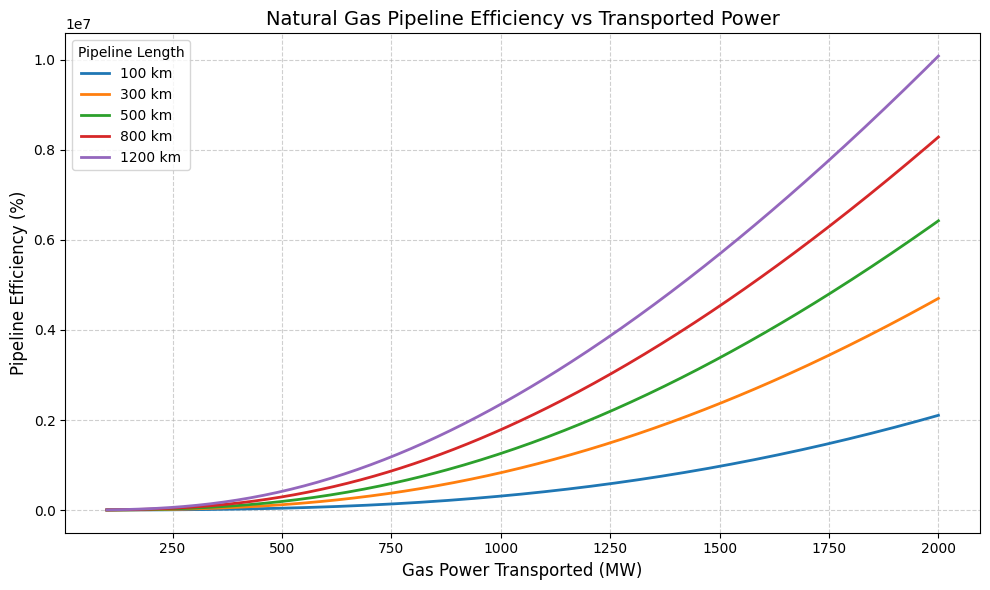

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Gas & pipeline constants
# -----------------------------
M_gas = 0.018                # molar mass [kg/mol]
R_univ = 8.314               # J/mol/K
R_s = R_univ / M_gas         # J/kg/K
k = 1.30                     # heat capacity ratio
Z = 0.90
T = 298.0                    # K
eta_c = 0.75                 # compressor efficiency

LHV = 50e6                   # J/kg

# Pipeline geometry
D = 16/39.37                 # m (≈36")
f = 0.011
p_out_bar = 70.0            # bar
p_out = p_out_bar * 1e5     # Pa

# Distances to plot
lengths_km = [100, 300, 500, 800, 1200]

# Power range for x-axis (MW)
P_gas_MW = np.linspace(100, 2000, 250)  # MW
P_gas_W = P_gas_MW * 1e6


# -----------------------------
# Helper: compressor power
# -----------------------------
def compressor_power(P_gas_W, L_km):
    m_dot = P_gas_W / LHV     # kg/s
    A = np.pi * D**2 / 4.0
    C = f * Z * R_s * T * m_dot**2 / (D * A**2)

    L_m = L_km * 1000
    p2_sq = p_out**2
    p1_sq = p2_sq + C * L_m
    p1 = np.sqrt(p1_sq)

    pi = p1 / p_out

    exponent = (k - 1.0) / k
    w = (k/(k-1)) * (R_s * T / Z) * (pi**exponent - 1.0) / eta_c  # J/kg

    P_comp = m_dot * w

    return P_comp   # W


# -----------------------------
# Plot efficiency vs power
# -----------------------------
plt.figure(figsize=(10,6))

for L in lengths_km:
    P_comp = compressor_power(P_gas_W, L)
    efficiency = (1 - P_comp/P_gas_W) * 100
    plt.plot(P_gas_MW, P_comp, label=f"{L} km", linewidth=2)

plt.xlabel("Gas Power Transported (MW)", fontsize=12)
plt.ylabel("Pipeline Efficiency (%)", fontsize=12)
plt.title("Natural Gas Pipeline Efficiency vs Transported Power", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(title="Pipeline Length")
plt.tight_layout()
plt.show()
